In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/convolve-epoch1/sample_submission.csv
/kaggle/input/convolve-epoch1/train.json
/kaggle/input/convolve-epoch1/test.csv


In [3]:
ser = pd.read_json('/kaggle/input/convolve-epoch1/train.json', typ='series')

In [4]:
df=ser.to_frame('count')

In [5]:
df

,count
1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected\n,normal
1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.527847 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected\n,normal
1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.675872 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected\n,normal
1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.823719 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected\n,normal
1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.982731 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected\n,normal
...,...
1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005-06-11-20.05.30.386651 R30-M0-N9-C:J16-U01 RAS KERNEL FATAL data TLB error interrupt,abnormal
1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005-06-11-20.05.30.558220 R30-M0-N9-C:J16-U01 RAS KERNEL FATAL data TLB error interrupt,abnormal
1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005-06-11-20.05.30.675784 R30-M0-N9-C:J16-U01 RAS KERNEL FATAL data TLB error interrupt,abnormal
1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005-06-11-20.05.30.777307 R30-M0-N9-C:J16-U01 RAS KERNEL FATAL data TLB error interrupt,abnormal


In [6]:
df=df.reset_index()

In [7]:
df['unique_id']=df['index'].str.strip().str.split(' ').str[2]

In [8]:
df

,index,count,unique_id
0,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11
1,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11
2,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11
3,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11
4,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11
...,...,...,...
4152654,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01
4152655,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01
4152656,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01
4152657,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01


In [9]:
df['date']=df['index'].str.strip().str.split(' ').str[1]

In [10]:
df

,index,count,unique_id,date
0,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11,2005.06.03
1,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11,2005.06.03
2,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11,2005.06.03
3,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11,2005.06.03
4,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11,2005.06.03
...,...,...,...,...
4152654,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005.06.11
4152655,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005.06.11
4152656,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005.06.11
4152657,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005.06.11


In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
df['date'].nunique()

181

In [13]:
df[df['count']=='normal'].groupby('date').size()

date
2005-06-03     14733
2005-06-04       693
2005-06-05    100811
2005-06-06     39457
2005-06-07     31919
               ...  
2005-11-27      1563
2005-11-28      2470
2005-11-29      8115
2005-11-30      9025
2005-12-01     89812
Length: 181, dtype: int64

In [20]:
df['text']=df['index'].str.strip().str.split(' ').str[5:]

In [23]:
df['text']=df['text'].apply(lambda x:" ".join(x))

In [24]:
df

,index,count,unique_id,date,text
0,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11,2005-06-03,RAS KERNEL INFO instruction cache parity error...
1,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11,2005-06-03,RAS KERNEL INFO instruction cache parity error...
2,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11,2005-06-03,RAS KERNEL INFO instruction cache parity error...
3,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11,2005-06-03,RAS KERNEL INFO instruction cache parity error...
4,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal,R02-M1-N0-C:J12-U11,2005-06-03,RAS KERNEL INFO instruction cache parity error...
...,...,...,...,...,...
4152654,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005-06-11,RAS KERNEL FATAL data TLB error interrupt
4152655,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005-06-11,RAS KERNEL FATAL data TLB error interrupt
4152656,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005-06-11,RAS KERNEL FATAL data TLB error interrupt
4152657,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005-06-11,RAS KERNEL FATAL data TLB error interrupt


In [56]:
X_old=df['text']

In [57]:
y_old=df['count']

In [59]:
X_old_tfidf=tfidf.transform(X_old)

In [25]:
df[df['count']=='abnormal'].groupby('date').size()

date
2005-06-04     2040
2005-06-05      569
2005-06-06        5
2005-06-07        5
2005-06-08      150
2005-06-09        4
2005-06-10        2
2005-06-11    66917
dtype: int64

In [26]:
dates=['2005-06-04','2005-06-05','2005-06-06','2005-06-07','2005-06-08','2005-06-09','2005-06-10','2005-06-11']


In [27]:
df_new=df[df['date'].isin(dates)]

In [28]:
df_new

,index,count,unique_id,date,text
14733,1117869001 2005.06.04 R33-M1-L0-U22-C 2005-06...,normal,R33-M1-L0-U22-C,2005-06-04,RAS LINKCARD INFO MidplaneSwitchController per...
14734,1117869001 2005.06.04 R27-M1-L3-U18-C 2005-06...,normal,R27-M1-L3-U18-C,2005-06-04,RAS LINKCARD INFO MidplaneSwitchController per...
14735,1117869871 2005.06.04 R23-M0-N4-I:J18-U11 200...,normal,R23-M0-N4-I:J18-U11,2005-06-04,RAS APP FATAL ciod: LOGIN chdir(/p/gb2/draeger...
14736,1117869871 2005.06.04 R23-M1-N8-I:J18-U01 200...,normal,R23-M1-N8-I:J18-U01,2005-06-04,RAS APP FATAL ciod: LOGIN chdir(/p/gb2/draeger...
14737,1117869913 2005.06.04 R23-M0-N4-I:J18-U11 200...,normal,R23-M0-N4-I:J18-U11,2005-06-04,RAS APP FATAL ciod: LOGIN chdir(/p/gb2/draeger...
...,...,...,...,...,...
4152654,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005-06-11,RAS KERNEL FATAL data TLB error interrupt
4152655,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005-06-11,RAS KERNEL FATAL data TLB error interrupt
4152656,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005-06-11,RAS KERNEL FATAL data TLB error interrupt
4152657,1118545530 2005.06.11 R30-M0-N9-C:J16-U01 2005...,abnormal,R30-M0-N9-C:J16-U01,2005-06-11,RAS KERNEL FATAL data TLB error interrupt


In [29]:
X_new=df_new['text']

In [30]:
y_new=df_new['count']

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
from sklearn.model_selection import train_test_split

In [40]:
tfidf=TfidfVectorizer()

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X_new, y_new, test_size=0.25, random_state=42)

In [42]:
tfidf.fit(X_train)

TfidfVectorizer()

In [43]:
X_new_train_tfidf=tfidf.transform(X_train)
X_new_test_tfidf=tfidf.transform(X_test)


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_model=LogisticRegression(solver='saga',max_iter=100000)

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
penalty=['l1','l2']
C=np.logspace(0,10,20)
param_grid={'penalty':penalty,
           'C':C}

In [48]:
grid_model=GridSearchCV(log_model,param_grid=param_grid)

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_new_train_tfidf,y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_new_train_tfidf,y_train)

In [52]:
log_model.fit(X_new_train_tfidf,y_train)

LogisticRegression(max_iter=100000, solver='saga')

In [53]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [54]:
def report(model):
    preds = model.predict(X_new_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_new_test_tfidf,y_test)

              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00     17622
      normal       1.00      1.00      1.00     51209

    accuracy                           1.00     68831
   macro avg       1.00      1.00      1.00     68831
weighted avg       1.00      1.00      1.00     68831



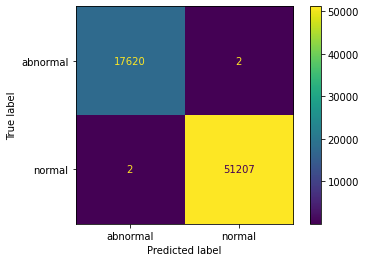

In [55]:
report(log_model)

In [60]:
old_preds=log_model.predict(X_old_tfidf)

In [63]:
len(old_preds)

4152659

In [65]:
print(classification_report(y_old,old_preds))

              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00     69692
      normal       1.00      1.00      1.00   4082967

    accuracy                           1.00   4152659
   macro avg       1.00      1.00      1.00   4152659
weighted avg       1.00      1.00      1.00   4152659



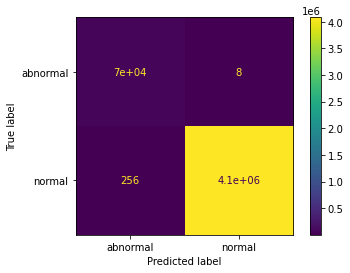

In [64]:
plot_confusion_matrix(log_model,X_old_tfidf,y_old)

In [66]:
df_final_test=pd.read_csv('/kaggle/input/convolve-epoch1/test.csv')

In [67]:
df_final_test

,ID,Log
0,0,1124336301 2005.08.17 R13-M1-N8-C:J12-U01 200...
1,1,1118553175 2005.06.11 R30-M0-N9-C:J16-U01 200...
2,2,1118536033 2005.06.11 R30-M0-N9-C:J16-U01 200...
3,3,1117992566 2005.06.05 R30-M1-N6-C:J03-U11 200...
4,4,1118538965 2005.06.11 R30-M0-N9-C:J16-U01 200...
...,...,...
595295,595295,1118768234 2005.06.14 R20-M0-NA-C:J17-U11 200...
595296,595296,1118370947 2005.06.09 R15-M0-NA-C:J02-U01 200...
595297,595297,1118540242 2005.06.11 R30-M0-N9-C:J16-U01 200...
595298,595298,1118538947 2005.06.11 R30-M0-N9-C:J16-U01 200...


In [70]:
df_final_test['text']=df_final_test[' Log'].str.strip().str.split(' ').str[5:]

In [71]:
df_final_test

,ID,Log,text
0,0,1124336301 2005.08.17 R13-M1-N8-C:J12-U01 200...,"[RAS, KERNEL, FATAL, rts:, kernel, terminated,..."
1,1,1118553175 2005.06.11 R30-M0-N9-C:J16-U01 200...,"[RAS, KERNEL, FATAL, data, TLB, error, interrupt]"
2,2,1118536033 2005.06.11 R30-M0-N9-C:J16-U01 200...,"[RAS, KERNEL, FATAL, data, TLB, error, interrupt]"
3,3,1117992566 2005.06.05 R30-M1-N6-C:J03-U11 200...,"[RAS, KERNEL, INFO, generating, core.6463]"
4,4,1118538965 2005.06.11 R30-M0-N9-C:J16-U01 200...,"[RAS, KERNEL, FATAL, data, TLB, error, interrupt]"
...,...,...,...
595295,595295,1118768234 2005.06.14 R20-M0-NA-C:J17-U11 200...,"[RAS, KERNEL, FATAL, exception, syndrome, regi..."
595296,595296,1118370947 2005.06.09 R15-M0-NA-C:J02-U01 200...,"[RAS, KERNEL, INFO, generating, core.10895]"
595297,595297,1118540242 2005.06.11 R30-M0-N9-C:J16-U01 200...,"[RAS, KERNEL, FATAL, data, TLB, error, interrupt]"
595298,595298,1118538947 2005.06.11 R30-M0-N9-C:J16-U01 200...,"[RAS, KERNEL, FATAL, data, TLB, error, interrupt]"


In [80]:
df_final_test['ID']

0              0
1              1
2              2
3              3
4              4
           ...  
595295    595295
595296    595296
595297    595297
595298    595298
595299    595299
Name: ID, Length: 595300, dtype: int64

In [72]:
df_final_test['text']=df_final_test['text'].apply(lambda x:" ".join(x))

In [74]:
df_final_test['text']

0         RAS KERNEL FATAL rts: kernel terminated for re...
1                 RAS KERNEL FATAL data TLB error interrupt
2                 RAS KERNEL FATAL data TLB error interrupt
3                      RAS KERNEL INFO generating core.6463
4                 RAS KERNEL FATAL data TLB error interrupt
                                ...                        
595295    RAS KERNEL FATAL exception syndrome register: ...
595296                RAS KERNEL INFO generating core.10895
595297            RAS KERNEL FATAL data TLB error interrupt
595298            RAS KERNEL FATAL data TLB error interrupt
595299                  RAS KERNEL INFO generating core.680
Name: text, Length: 595300, dtype: object

In [75]:
X_final_test=df_final_test['text']

In [76]:
X_final_test_tfidf=tfidf.transform(X_final_test)

In [77]:
final_test_preds=log_model.predict(X_final_test_tfidf)

In [79]:
len(final_test_preds)

595300

In [81]:
final_results=pd.DataFrame(index=df_final_test['ID'],data=final_test_preds)

In [89]:
final_results.columns=[' Label']

In [90]:
final_results

,Label
ID,
0,normal
1,abnormal
2,abnormal
3,normal
4,abnormal
...,...
595295,normal
595296,normal
595297,abnormal


In [91]:
final_results.to_csv('final_results')

In [23]:
df['count'].value_counts()

normal      4082967
abnormal      69692
Name: count, dtype: int64

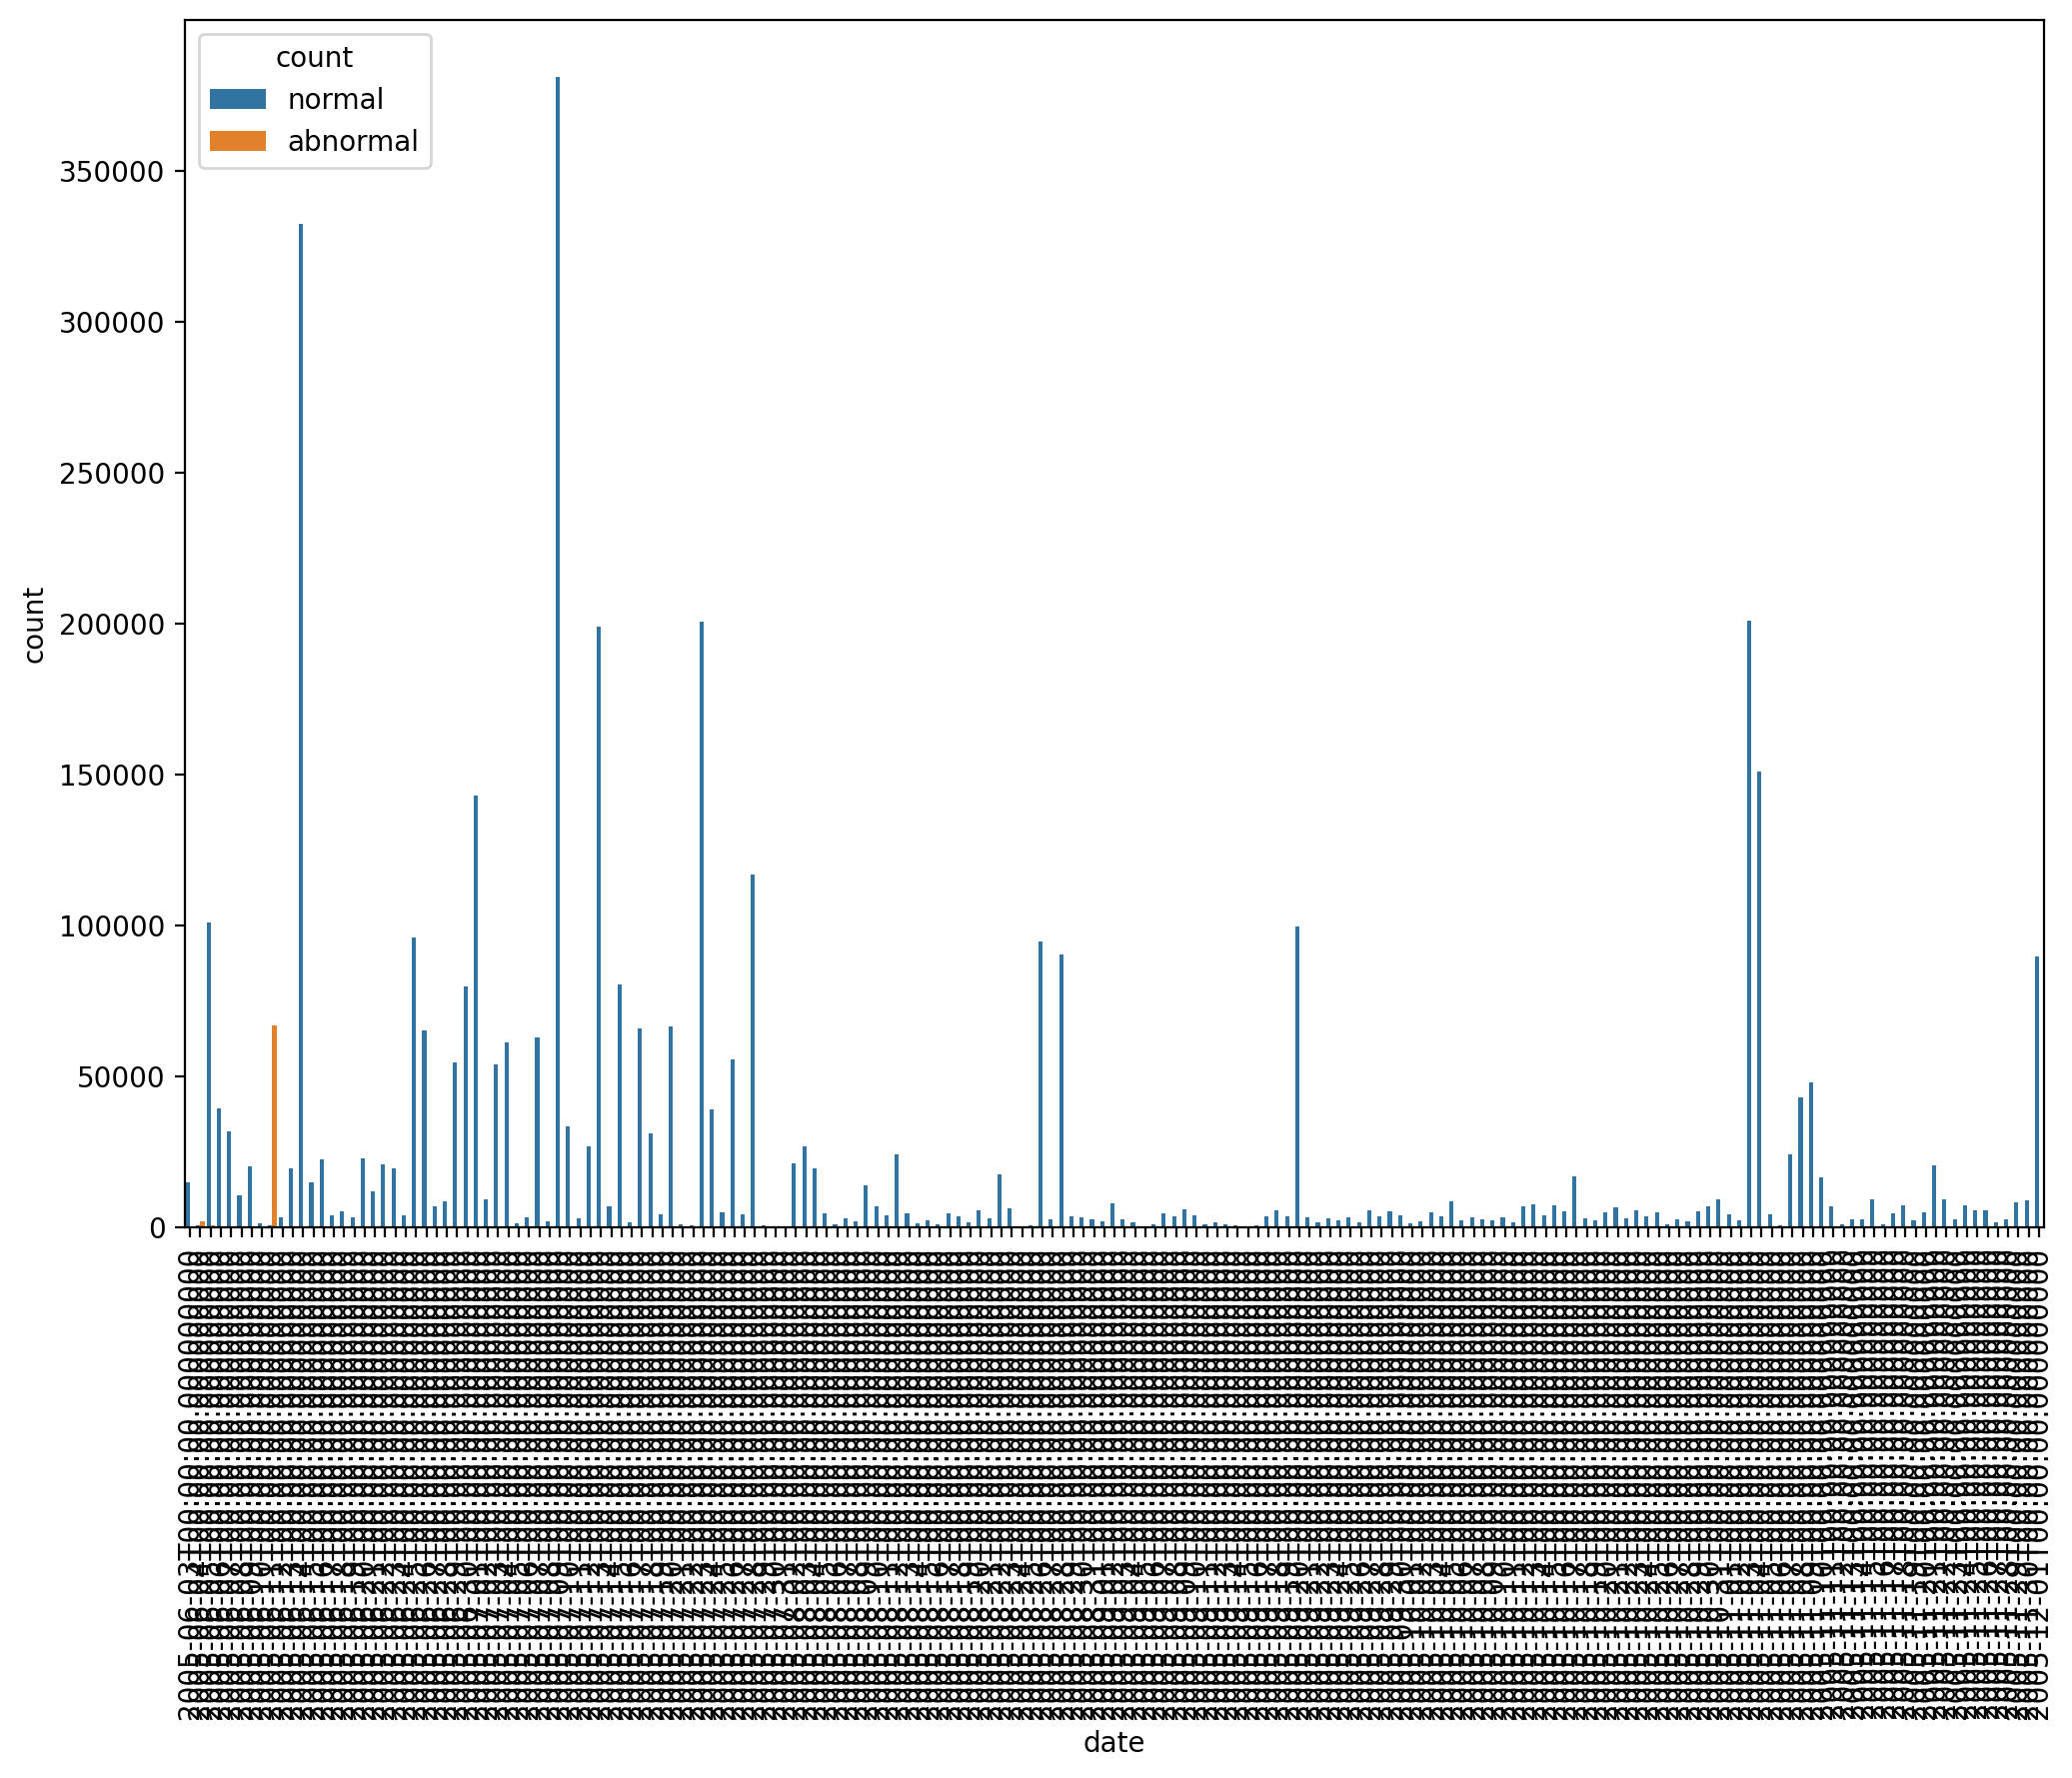

In [20]:
plt.figure(dpi=200,figsize=(12,8))
sns.countplot(x='date',data=df,hue='count')
plt.xticks(rotation=90);